# HW1 Programming Problem 3 (10 points)

In this problem, you will implement a K-NN regressor from scratch. Start by running the following cell to load the dataset.

Dataset:
- `w1_data`: $w_1$ values
- `w2_data`: $w_2$ values
- `L_data`: $L$ values

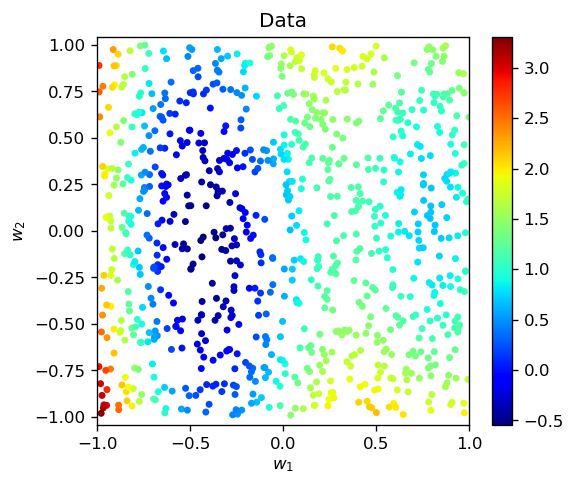

In [18]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
N = 876
w1_data = np.random.uniform(-1,1,N)
w2_data = np.random.uniform(-1,1,N)
L_data = np.cos(4*w1_data + w2_data/4 - 1) + w2_data**2 + 2*w1_data**2

plt.figure(figsize=(5,4.2),dpi=120)
plt.scatter(w1_data,w2_data,s=10,c=L_data,cmap="jet")
plt.colorbar()
plt.axis("equal")
plt.xlabel("$w_1$")
plt.ylabel("$w_2$")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title("Data")
plt.show()


## K - Nearest Neighbors Regressor

### Distance function
Now we will implement an unweighted K-NN regressor. First, finish the function `distance(w1, w2)` which computes the euclidean distance between a point `[w1, w2]` and each pair from `w1_data, w2_data`.
The function should return an array of distances with the same length as `w1_data` or `w2_data`. Instead of using a for loop, you can do this by subtracting each individual scalar from the corresponding data array. For example, `w1 - w1_data` is an array that contains the difference between `w1` and each element in `w1_data`.
Complete the function to compute the array $\sqrt{(w_1 - w_{1,data (i)})^2 + (w_2 - w_{2,data (i)})^2}$.

In [19]:
def distance(w1, w2):
    # YOUR CODE GOES HERE
    return np.sqrt((w1_data - w1)**2 + (w2_data - w2)**2)

# Check that the function outputs the correct array size
assert(distance(0, 0).shape == w1_data.shape)

## Sorting a distance array

You can get the k-smallest elements of an array by using the `np.argpartition()` function. `np.argpartition(A, k)[:k]` returns an array of `k` indices corresponding to the k-smallest values in `A`.
If we apply this to an array of distances from a point $w$ to each data point, we can get the indices of the k-nearest neighbors of $w$. Complete the function below to do this.

In [20]:
def get_knn_indices(w1, w2, k):
    d = distance(w1, w2)
    return np.argsort(d)[:k]


# Check the function on the point w=(0,0) with k=5
indices = get_knn_indices(0,0,5)
print("5 points nearest (0,0):", indices, "\n(Should be 255 733 538 815 501)")

5 points nearest (0,0): [815 501 733 255 538] 
(Should be 255 733 538 815 501)


## Unweighted regression

After acquiring the indices of the nearest points, you can determine the output values at these points by indexing into `L_data`, as in: `L_data[indices]`. Then, the function `np.mean()` can be used to compute the average value of these points. Complete the function below to do this. Return from this function a single value, the average of the k points closest to $w$.

In [21]:
def knn_regress(w1, w2, k):
    indices = get_knn_indices(w1, w2, k)
    return np.mean(L_data[indices], axis=0)

# Check the function on the point w=(0,0) with k=2
val = knn_regress(0,0,2)
print("Mean of 2 points nearest (0,0):", val, "\n(Should be about 0.72)")

Mean of 2 points nearest (0,0): 0.7190087852048137 
(Should be about 0.72)


## Plotting the K-NN function

Now we will evaluate the function on a meshgrid of points. `np.meshgrid` is used frequently for 2D visualization, so step through the next few cells to see how it works.

First, we choose arrays of values for `w1` and `w2` that we want to be the x- and y- coordinates of grid points:

In [22]:
w1_vals = np.linspace(-1,1,50)
w2_vals = np.linspace(-1,1,50)
print("w1 grid values:",w1_vals)
print("w2 grid values:",w2_vals)

w1 grid values: [-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18367347
  0.2244898   0.26530612  0.30612245  0.34693878  0.3877551   0.42857143
  0.46938776  0.51020408  0.55102041  0.59183673  0.63265306  0.67346939
  0.71428571  0.75510204  0.79591837  0.83673469  0.87755102  0.91836735
  0.95918367  1.        ]
w2 grid values: [-1.         -0.95918367 -0.91836735 -0.87755102 -0.83673469 -0.79591837
 -0.75510204 -0.71428571 -0.67346939 -0.63265306 -0.59183673 -0.55102041
 -0.51020408 -0.46938776 -0.42857143 -0.3877551  -0.34693878 -0.30612245
 -0.26530612 -0.2244898  -0.18367347 -0.14285714 -0.10204082 -0.06122449
 -0.02040816  0.02040816  0.06122449  0.10204082  0.14285714  0.18

Next, we get a 'cartesian product' of these arrays -- we get every combination of them; these will be our grid points. For this we use `np.meshgrid()`.

Note that we flatten these arrays to get 1-D arrays of the grid points' coordinates:

In [23]:
w1s, w2s = np.meshgrid(w1_vals, w2_vals)
print("Size of w1 grid point array:", w1s.shape)
print("Size of w2 grid point array:", w2s.shape)

w1_grid, w2_grid = w1s.flatten(), w2s.flatten()
print("Flattened size of w1 grid point array:", w1_grid.shape)
print("Flattened size of w2 grid point array:", w2_grid.shape)

Size of w1 grid point array: (50, 50)
Size of w2 grid point array: (50, 50)
Flattened size of w1 grid point array: (2500,)
Flattened size of w2 grid point array: (2500,)


Now, we can loop through these arrays to call our K-NN regression function on the whole meshgrid, and plot it. Here we set k = 4, but this will be changed later.

In [33]:
k = 1
L_grid = np.zeros_like(w1_grid)
for i in range(len(L_grid)):
    L_grid[i] = knn_regress(w1_grid[i], w2_grid[i],k)

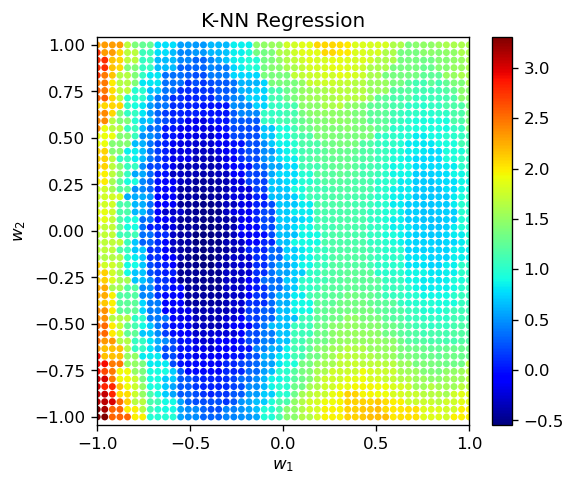

In [34]:
plt.figure(figsize=(5,4.2),dpi=120)
plt.scatter(w1_grid,w2_grid,s=10,c=L_grid,cmap="jet")
plt.colorbar()
plt.axis("equal")
plt.xlabel("$w_1$")
plt.ylabel("$w_2$")
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.title("K-NN Regression")
plt.show()


## Question

Go back a couple cells and experiment with changing the `k` value. Is the regression function "smoother" with lower or higher `k`? Why do you think that is?


The regreession function will be more smoother with higher k value. This is because the higher the k value, the more points are considered in the average. This will result in a smoother function because the average of more points will be more stable than the average of fewer points.